In [32]:
import pandas as pd
import numpy as np
import re
import plotly.graph_objects as go
import plotly.express as px
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline() # Use Plotly locally

pd.set_option('display.max_columns',150)
pd.set_option('display.max_rows',150)

df = pd.read_csv('merged_rental_hyderabad.csv')

In [33]:
filt = (df['property_type']=='Builder Floor Apartment')
df1 = df.loc[filt]

In [34]:
df1.shape

(880, 20)

In [35]:
loc_grp = df1.groupby('locality')
df1['loc_count'] = loc_grp['locality'].transform('count')

df1 = df1[df1['loc_count']>=5]
loc_grp = df1.groupby('locality')
loc_rents = loc_grp['price'].mean()
loc_rents = dict(loc_rents)

list1 = list(loc_rents.keys())
list2 = list(loc_rents.values())
list2 = [int(i) for i in list2]

loc_df = pd.DataFrame(list(zip(list1,list2)), columns=['locality','average_rent'])
loc_df.sort_values(by='average_rent',ascending=False,inplace=True)

fig = px.bar(loc_df[0:20],y='locality', x='average_rent', text='average_rent',orientation='h',
            labels={'average_rent':'Average Rent'}, color='average_rent', color_continuous_scale = 'Turbo') 

fig.update_traces(textposition='outside')
fig.update_layout(title_text="<b>Most Expensive Locations (Builder Floor Apartment)</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.57,
                 title_y=0.95,
                 title_xanchor='center',
                 title_yanchor='top',
                 yaxis={'categoryorder':'total ascending'}
                 )

fig.update_xaxes(
        color='teal',
        title_text='Average Rent (INR)',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        gridcolor='lightblue',
        tickmode='auto',
        linecolor='red',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Location',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        nticks = 20,
        gridcolor='lightblue',
        linecolor='red',
        linewidth=3,
        mirror = True)

In [36]:
loc_grp = df1.groupby('locality')
df1['loc_count'] = loc_grp['locality'].transform('count')

df1 = df1[df1['loc_count']>=5]
loc_grp = df1.groupby('locality')
loc_rents = loc_grp['price'].mean()
loc_rents = dict(loc_rents)

list1 = list(loc_rents.keys())
list2 = list(loc_rents.values())
list2 = [int(i) for i in list2]

loc_df = pd.DataFrame(list(zip(list1,list2)), columns=['locality','average_rent'])
loc_df.sort_values(by='average_rent',ascending=True,inplace=True)

fig = px.bar(loc_df[0:20],y='locality', x='average_rent', text='average_rent',orientation='h',
            labels={'average_rent':'Average Rent'}, color='average_rent', color_continuous_scale = 'Turbo') 

fig.update_traces(textposition='outside')
fig.update_layout(title_text="<b>Most Affordable Locations (Builder Floor Apartments)</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.57,
                 title_y=0.95,
                 title_xanchor='center',
                 title_yanchor='top',
                 yaxis={'categoryorder':'total descending'}
                 )

fig.update_xaxes(
        color='teal',
        title_text='Average Rent (INR)',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        gridcolor='lightblue',
        tickmode='auto',
        linecolor='red',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Location',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        nticks = 20,
        gridcolor='lightblue',
        linecolor='red',
        linewidth=3,
        mirror = True)

In [37]:
furnished = df1['furnish_status'].value_counts()
furnished = dict(furnished)

fig = px.pie(values=list(furnished.values()), names=list(furnished.keys()), hole=0.3,
            color_discrete_sequence=px.colors.sequential.Turbo)
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(title_text="<b>Furnished Status (Builder Floor Apartments)</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.45,
                 title_y=0.95,
                 title_xanchor='center',
                 title_yanchor='top'
                 )

In [38]:
fur_grp = df1.groupby('furnish_status')
fur_rents = fur_grp['price'].mean()
fur_rents = dict(fur_rents)
list1 = fur_rents.keys()
list2 = fur_rents.values()
furrents_df = pd.DataFrame(list(zip(list1,list2)), columns=['furnish_type','mean_rent'])
furrents_df['mean_rent'] = furrents_df['mean_rent'].astype(int)

fig = px.bar(furrents_df,x='furnish_type', y='mean_rent', text='mean_rent',
            labels={'mean_rent':'Average Rent'}, color='mean_rent', color_continuous_scale = 'viridis') 

fig.update_traces(textposition='outside')
fig.update_layout(title_text="<b>Average Rents: Builder Floor Apartments (by Furnished Status)</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.47,
                 title_y=0.95,
                 title_xanchor='center',
                 title_yanchor='top',
                 yaxis={'categoryorder':'total ascending'}
                 )

fig.update_xaxes(
        color='teal',
        title_text='Property Type',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        gridcolor='lightblue',
        tickmode='auto',
        linecolor='red',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Average Rent (INR)',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        nticks = 20,
        gridcolor='lightblue',
        linecolor='red',
        linewidth=3,
        mirror = True)

In [39]:
prop = df1['marital_status_pref'].value_counts()
prop = dict(prop)

fig = px.pie(values=list(prop.values()), names=list(prop.keys()), hole=0.3,
            color_discrete_sequence=px.colors.sequential.Hot)
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(title_text="<b>Tenants Preferred (Builder Floor Apartments)</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.5,
                 title_y=0.95,
                 title_xanchor='center',
                 title_yanchor='top'
                 )

In [40]:
df1['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')
mean_list = []

for i in range(7,10):
    filt = (df1['date_posted'].dt.month==i)
    df_new = df1.loc[filt]
    mean_list.append(df_new['price'].mean())

mean_list = list(map(int,mean_list))    
mean_names = ['July 2021', 'August 2021','September 2021']

fig = go.Figure()

fig.add_trace(go.Bar(
    x= mean_names,
    y= mean_list,
    name='Average Rent Value',
    marker_color='RoyalBlue',
    text=mean_list)
             )

fig.update_traces(textposition='outside')

fig.update_layout(title_text="<b>Monthly Trends: Average Rents (Builder Floor Apartments)</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.5,
                 title_y=0.90,
                 title_xanchor='center',
                 title_yanchor='top'
                 )

fig.update_xaxes(
        color='teal',
        title_text='Month',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickmode='auto',
        nticks=48,
        linecolor='red',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Average Rent (INR)',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        linecolor='red',
        linewidth=3,
        mirror = True) 

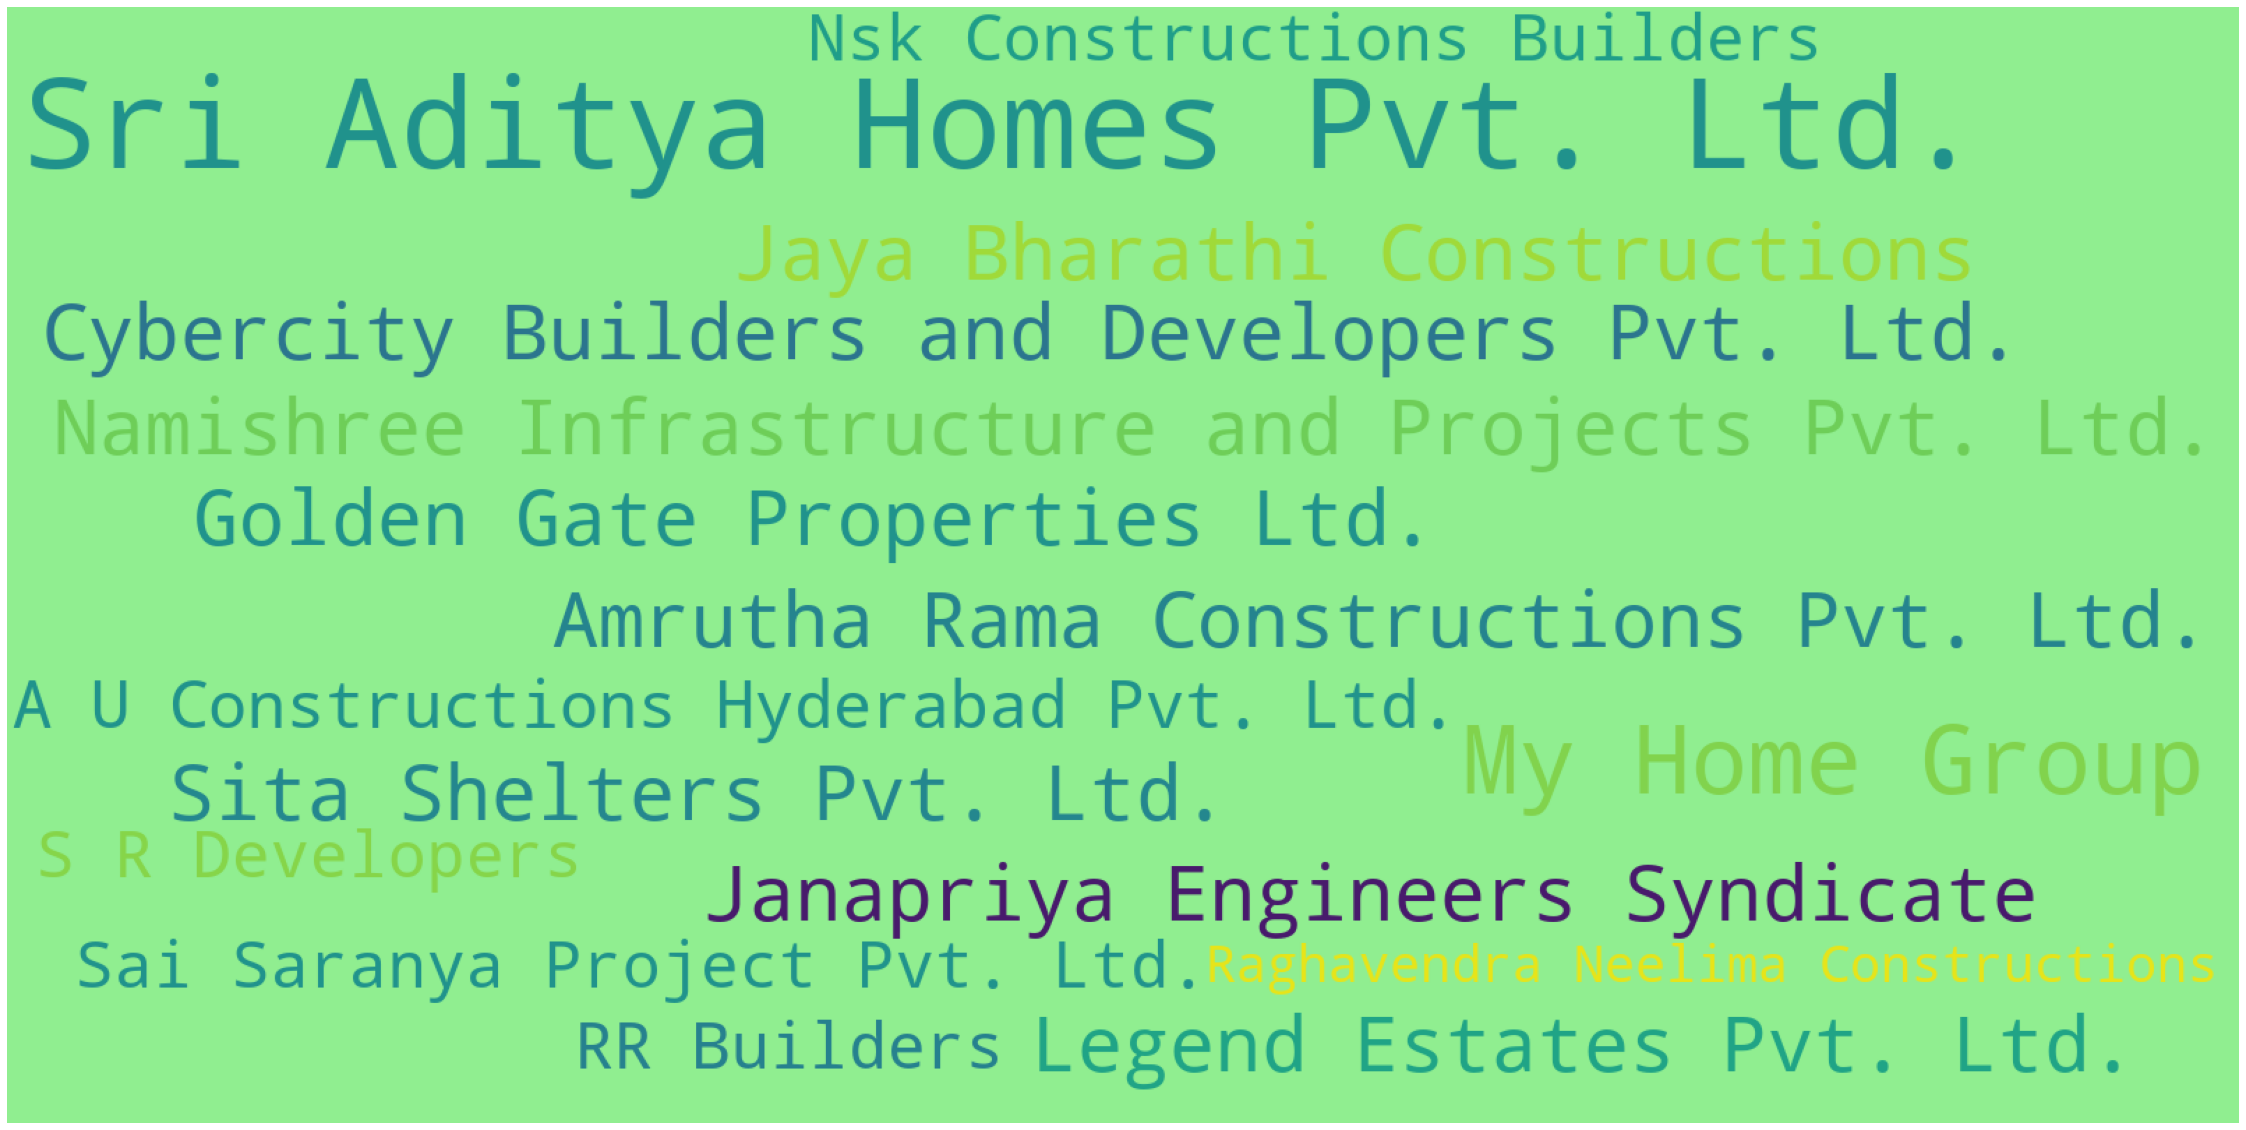

In [41]:
df1['builder'] = df1['builder'].replace(np.nan,'',regex=True)
builder_list = df1['builder'].values.tolist()

count = Counter(builder_list)
wordcloud = WordCloud(width = 1600, height = 800,background_color='lightgreen')\
.generate_from_frequencies(count)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud)
plt.axis("off")
plt.show() 

In [42]:
project_df = df1
project_df['pro_loc'] = project_df['project'] + ':' + project_df['locality']
project_grp = project_df.groupby('pro_loc')
project_df['project_count'] = project_grp['project'].transform('count')
project_df = project_df.loc[project_df['project_count']>=1]
project_grp = project_df.groupby('pro_loc')
project_rents = project_grp['price'].mean()
project_rents = dict(project_rents)
list1 = project_rents.keys()
list2 = project_rents.values()
projectrents_df = pd.DataFrame(list(zip(list1,list2)), columns=['project','mean_rent'])
projectrents_df['mean_rent'] = projectrents_df['mean_rent'].astype(int)

fig = px.bar(projectrents_df[0:20],y='project', x='mean_rent', text='mean_rent',orientation='h',
            labels={'mean_rent':'Average Rent'}, color='mean_rent', color_continuous_scale = 'Turbo') 

fig.update_traces(textposition='outside')
fig.update_layout(title_text="<b>Average Rents by Project (Builder Floor Apartments)</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.63,
                 title_y=0.95,
                 title_xanchor='center',
                 title_yanchor='top',
                 yaxis={'categoryorder':'total ascending'}
                 )

fig.update_xaxes(
        color='teal',
        title_text='Average Rent (INR)',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        gridcolor='lightblue',
        tickmode='auto',
        linecolor='red',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Project',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        nticks = 20,
        gridcolor='lightblue',
        linecolor='red',
        linewidth=3,
        mirror = True)
